In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("Swiggy Bangalore Outlet Details.csv")

In [3]:
data.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [4]:
data.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [6]:
data.shape

(118, 5)

## Data Cleaning and Manipulation

In [7]:
data.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [9]:
data.duplicated().sum()

0

- there are no missing values and no duplicates in our dataset

In [10]:
data["Shop_Name"].value_counts()

La Pino'z Pizza                     2
Leon Grill                          2
Easy Bites                          2
Kanti Sweets                        1
CRAVY WINGS - The American Diner    1
                                   ..
Hyderabadi Biryani Hub              1
Taco Bell                           1
Oottupura                           1
Madurai Idly Shop                   1
Mani's Dum Biryani                  1
Name: Shop_Name, Length: 115, dtype: int64

In [11]:
data["Shop_Name"].unique()

array(['Kanti Sweets', 'Mumbai Tiffin', 'Sri Krishna sagar', 'Al Daaz',
       'Beijing Bites', 'Kitchens of Punjab',
       '99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court',
       "La Pino'z Pizza", 'Hotel Manu', 'Yumlane Pizza',
       'Ambur Star Briyani', 'Cake Box', 'Meghana Foods', 'Momoz',
       'A2B - Adyar Ananda Bhavan', 'Shawarma Inc',
       'WarmOven Cake & Desserts', 'Sri Lakshmi Dhaba',
       'Falahaar & Kota Kachori', 'Shree Khana Khazana',
       'Just Bake - Cakes & confectioners', 'Maa Di Hatti',
       'Hotel Godavari', 'Rolls On Wheels', 'New Udupi Grand',
       'Swad Punjab da', 'Rice Bowl', 'High N Hungry', 'Burger King',
       'Nandhana Palace', 'Easy Bites', 'Bengali Fun Foods',
       'Madurai Idly Shop', 'Oottupura', 'Taco Bell',
       'Hyderabadi Biryani Hub', 'Biriyani Zone', "Gongura's",
       'Bathinda Junction', 'Leon Grill', "Venu's Donne Biryani",
       'Cakewala', 'Swadista Aahar', 'Cream Stone',
       'Svadu Pure Ghee Sweets', 'Sai Abh

In [12]:
data["Rating"].value_counts()

4.1    30
4.3    23
4      21
3.9    13
4.2    10
3.7     6
4.4     4
3.8     4
3.6     2
4.6     2
4.8     1
4.5     1
--      1
Name: Rating, dtype: int64

In [20]:
data["Rating"] = data["Rating"].str.replace("--", data["Rating"].mode()[0]).astype(float)

In [21]:
data["Rating"].unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6])

In [23]:
data["Cost_for_Two"].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [26]:
data["Cost_for_Two"] = data["Cost_for_Two"].str.replace("₹", "").astype(int)

In [27]:
data["Cost_for_Two"].unique()

array([150, 400, 126, 450, 350, 200, 500, 247, 550, 300, 129, 250, 268,
       600, 527, 130, 257, 280, 399, 220, 800, 100, 178, 120, 251, 650,
       132, 153, 219, 193])

In [28]:
data["Cuisine"].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [29]:
data["Location"].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [39]:
data["Location"] = data["Location"].str.replace('Koramangla, Koramangala',"Koramangala") 
data["Location"] = data["Location"].str.replace('Btm, BTM',"BTM")
data["Location"] = data["Location"].str.replace('BTM, BTM',"BTM")
data["Location"] = data["Location"].str.replace('HSR, HSR',"HSR")

In [42]:
data.sample(20)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
61,Cake Garden,"Desserts, Bakery",HSR,3.9,250
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",HSR,4.4,400
63,Biryani Khazana,Biryani,"Koramangala, Koramangala",4.3,400
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
92,BIRYANI CRAFTS,Indian,BTM,4.1,500
101,Easy Bites,"Snacks, American","9th Main Rd, Sector 6, HSR Layout, HSR",3.8,200
82,Natural Ice Cream,Ice Cream,"Near Wipro Park Signal, Koramangala",4.6,150
88,Khawa Karpo,Chinese,"Koramangala, Koramangala",4.3,178
93,Madeena Hotel,"Desserts, Mughlai, Seafood","5th Block Kormangala, Koramangala",4.1,500
23,Rolls On Wheels,Fast Food,"1st Block, Koramangala",4.1,300


## Data visualization

Text(0.5, 0, 'Rating')

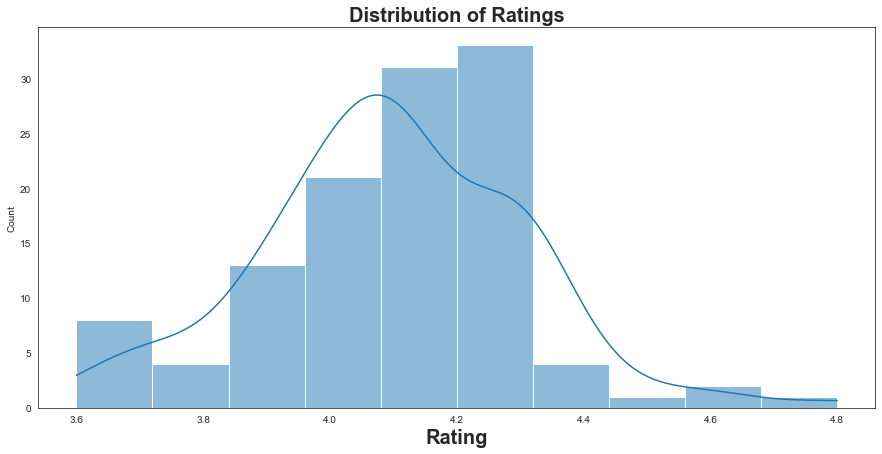

In [47]:
sns.set_style("white")
plt.figure(figsize=(15 , 7))
sns.histplot(data["Rating"], kde=True)
plt.title('Distribution of Ratings', weight='bold', fontsize=20)
plt.xlabel('Rating', weight='bold', fontsize=20)

- Based on the above chart Rating column is normally distributed between 4.1 to 4.3

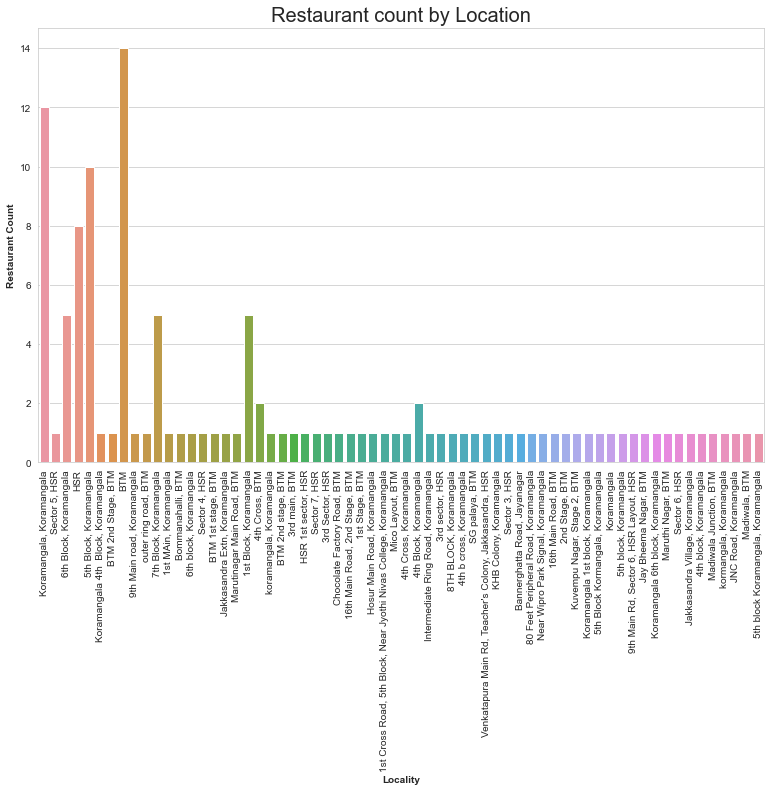

In [57]:
# Count plot based on location
sns.set_style('whitegrid')
plt.figure(figsize=(13,8))
sns.countplot(x= data['Location'])
plt.title('Restaurant count by Location', fontsize=20)
plt.xlabel('Locality', weight= 'bold')
plt.ylabel('Restaurant Count', weight = 'bold')
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, 'Sweets'),
  Text(1, 0, 'North Indian, Home Food, Thalis, Combo'),
  Text(2, 0, 'South Indian, North Indian, Fast Food, Beverages, Jain'),
  Text(3, 0, 'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian'),
  Text(4, 0, 'Chinese, Thai'),
  Text(5, 0, 'North Indian'),
  Text(6, 0, 'Fast Food, North Indian, Chinese'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'South Indian, Kerala, Chinese, North Indian'),
  Text(9, 0, 'Pizzas, Italian, Mexican'),
  Text(10, 0, 'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood'),
  Text(11, 0, 'Desserts'),
  Text(12, 0, 'C

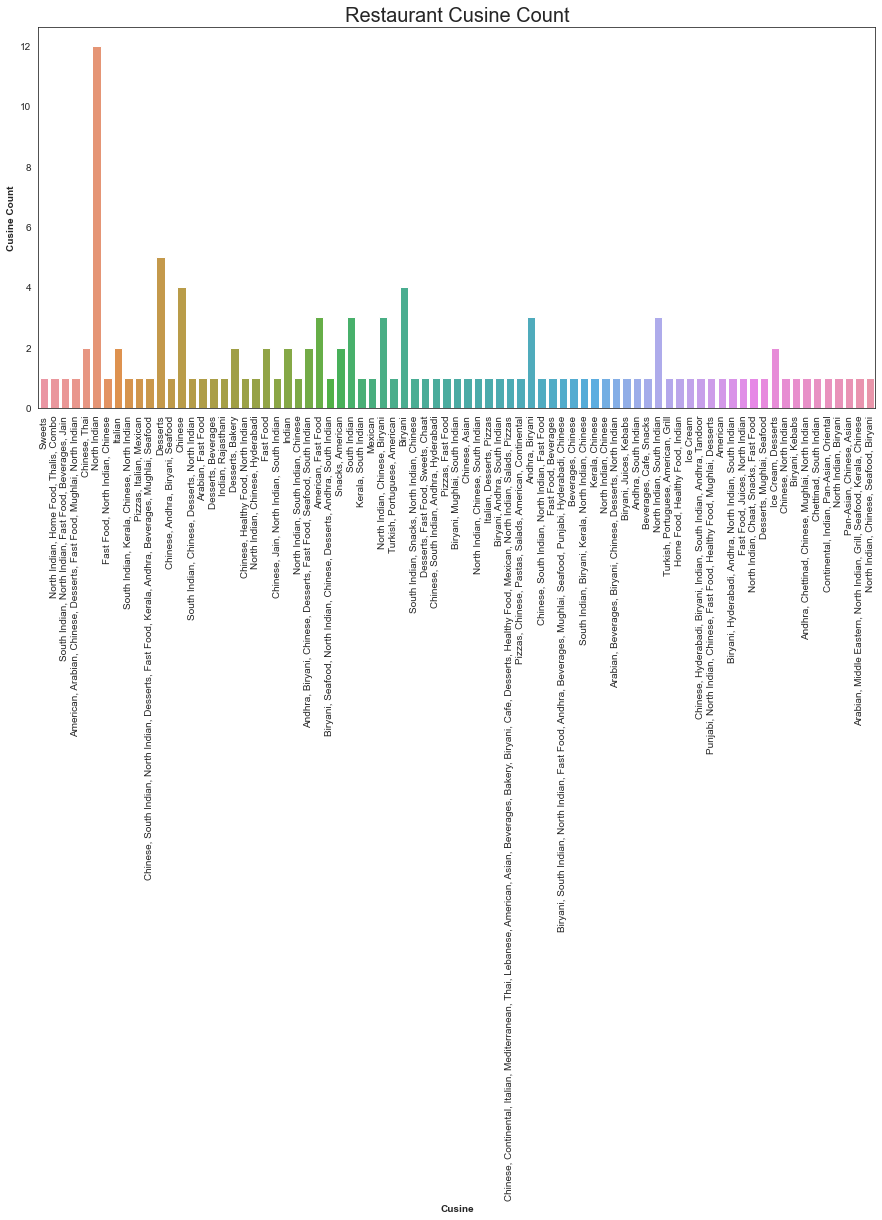

In [64]:
sns.set_style("white")
plt.figure(figsize=(15 , 7))
sns.countplot(x = data["Cuisine"])
plt.title('Restaurant Cusine Count', fontsize=20)
plt.xlabel('Cusine', weight= 'bold')
plt.ylabel('Cusine Count', weight = 'bold')
plt.xticks(rotation=90)

In [67]:
df_toprestaurants= data[data['Rating']>=4.4]
df_toprestaurants = df_toprestaurants.loc[:, ['Shop_Name', 'Rating', 'Cost_for_Two']]
df_toprestaurants.sort_values(by=['Rating'], ascending=False)

,Shop_Name,Rating,Cost_for_Two
78,Khichdi Experiment,4.8,200
82,Natural Ice Cream,4.6,150
94,Corner House Ice Cream,4.6,250
80,Chinese Bae,4.5,450
1,Mumbai Tiffin,4.4,400
3,Al Daaz,4.4,400
48,China Pearl,4.4,527
111,Bowl 99,4.4,200


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Mumbai Tiffin'),
  Text(1, 0, 'Al Daaz'),
  Text(2, 0, 'China Pearl'),
  Text(3, 0, 'Khichdi Experiment'),
  Text(4, 0, 'Chinese Bae'),
  Text(5, 0, 'Natural Ice Cream'),
  Text(6, 0, 'Corner House Ice Cream'),
  Text(7, 0, 'Bowl 99')])

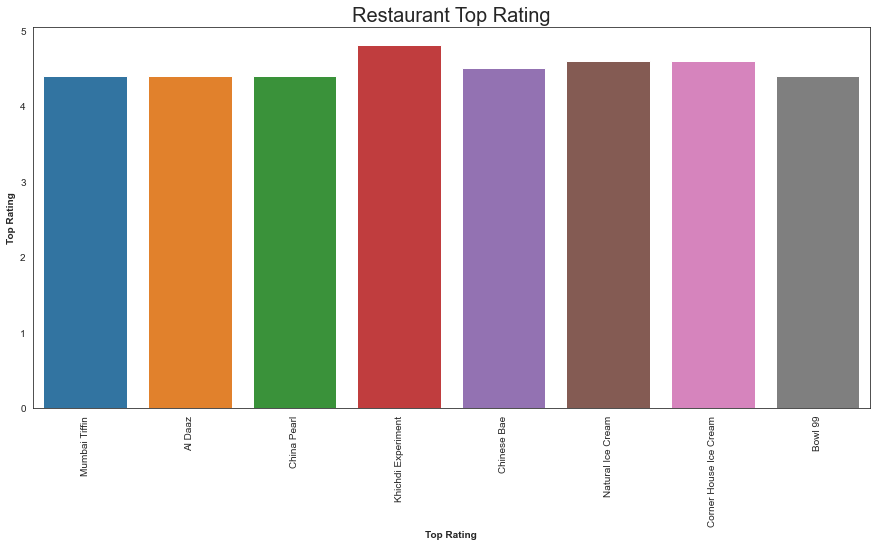

In [70]:
sns.set_style("white")
plt.figure(figsize=(15 , 7))
sns.barplot(x = df_toprestaurants["Shop_Name"], y=df_toprestaurants["Rating"])
plt.title('Restaurant Top Rating', fontsize=20)
plt.xlabel('Top Rating', weight= 'bold')
plt.ylabel('Top Rating', weight = 'bold')
plt.xticks(rotation=90)